# FRONTEND - BID CURVE

In [5]:
import streamlit as st
import altair as alt
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line

In [47]:
df_curve = pd.read_csv('/home/dsc/Repos/TFM/PALOS1_DataFrame.csv',index_col=0)
df_curve.describe()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Energy_tot,Marg_Price
count,7.111200e+04,71112.000000,71112.000000,71112.000000,71112.000000,71112.000000,71112.000000,71112.000000,71112.000000,71112.000000
mean,3.941000e+02,2019.858435,6.362217,15.931404,15.879416,6.519223,52.564769,46.995838,283.635983,34.415087
std,4.406533e-10,0.348606,3.433946,8.900143,5.272937,3.635035,48.738841,75.620040,69.736990,11.466836
min,3.941000e+02,2019.000000,1.000000,1.000000,1.000000,1.000000,1.130000,3.000000,50.000000,0.010000
25%,3.941000e+02,2020.000000,3.000000,8.000000,12.000000,3.000000,35.400000,17.000000,224.000000,26.950000
50%,3.941000e+02,2020.000000,6.000000,16.000000,16.000000,6.000000,40.720000,17.000000,275.000000,35.770000
75%,3.941000e+02,2020.000000,9.000000,24.000000,20.000000,10.000000,45.420000,17.000000,343.000000,42.500000
max,3.941000e+02,2020.000000,12.000000,31.000000,25.000000,12.000000,180.300000,394.100000,394.100000,65.640000


In [57]:
%%writefile TFM_frontend_BidCurve.py

import streamlit as st
import altair as alt
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

from TFM_PredCurve_Tools import data_date_hour_info, convert_to_df_curve, days_25h_23h
from TFM_PredCurve_Tools import data_report, data_report_total, missing_dates, bid_hour_summary
from TFM_PredCurve_Tools import plot_bid_curve, plot_marginal_price, plot_bid_margprice, plot_bid_margprice_day
from TFM_PredCurve_Tools import plot_bid_curve_day, plot_marginal_price_day, myplot, plot_24bids
from TFM_PredCurve_Tools import plot_bid_timeperiod, plot_bid_timeperiod_line
from TFM_PredCurve_Tools import plot_energy_timeperiod, plot_energy_timeperiod_line


st.write('# UNIT BID COMPARISON')

@st.cache
def get_cars():
    time.sleep(3)
    return data.cars()

@st.cache
def get_subset(origin, df):
    time.sleep(5)
    return df[df['Origin']== origin]


unit = st.selectbox('SELECT A UNIT', ['PALOS1', 'PALOS2'])
year = st.selectbox('SELECT A YEAR', [2019, 2020])
month = st.selectbox('SELECT A MONTH', [i for i in range(1, 13)])
day = st.selectbox('SELECT A DAY', [i for i in range(1, 32)])
hour = st.selectbox('SELECT AN HOUR', [i for i in range(1, 25)])

date = str(year) + '-' + str(month) + '-' + str(day)

#df_curve = st.file_uploader("/home/dsc/Repos/TFM/PALOS1_DataFrame.csv", type="csv")

df_curve = pd.read_csv('/home/dsc/Repos/TFM/PALOS1_DataFrame.csv',index_col=0)
df_curve['Date'] = df_curve['Date'].astype('datetime64[ns]')

#plot_bid_curve(df_curve, date, int(hour))

df_plot = df_curve[(df_curve['Date'] == date) & (df_curve['Period'] == hour)]

my_chart = alt.Chart(df_plot).mark_point().encode(x='Energy_tot', y='Price', color='Block').interactive()

st.altair_chart(my_chart)

#st.write('gracias por visitarme, %s' % name)

Overwriting TFM_frontend_BidCurve.py


In [52]:
date = '2020-02-01'
hour = int('20')
unit = 'PALOS1'

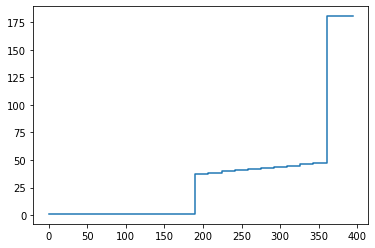

In [53]:
plot_bid_curve(df_curve, date, hour)